In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(color_codes = True)
import scipy.stats as stats
from scipy.stats import norm
import warnings
warnings.filterwarnings("ignore")

## EXPLORATORY DATA ANALYSIS

In [11]:
w_df = pd.read_csv("walmart_data.csv")
w_df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969


In [12]:
# Shape of the dataframe
w_df.shape

(550068, 10)

In [13]:
# Name of each column in dataframe
w_df.columns

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category',
       'Purchase'],
      dtype='object')

In [14]:
# Datatype of each column in dataframe
w_df.dtypes

User_ID                        int64
Product_ID                    object
Gender                        object
Age                           object
Occupation                     int64
City_Category                 object
Stay_In_Current_City_Years    object
Marital_Status                 int64
Product_Category               int64
Purchase                       int64
dtype: object

## FINDING THE UNIQUE VALUES AND COUNT THEM

In [15]:
def unique_values(df):
    for column in df.columns:
        u_values =df[column].unique()
        print(f"\nunique Values of {column}: ",u_values)
unique_values(w_df)


unique Values of User_ID:  [1000001 1000002 1000003 ... 1004113 1005391 1001529]

unique Values of Product_ID:  ['P00069042' 'P00248942' 'P00087842' ... 'P00370293' 'P00371644'
 'P00370853']

unique Values of Gender:  ['F' 'M']

unique Values of Age:  ['0-17' '55+' '26-35' '46-50' '51-55' '36-45' '18-25']

unique Values of Occupation:  [10 16 15  7 20  9  1 12 17  0  3  4 11  8 19  2 18  5 14 13  6]

unique Values of City_Category:  ['A' 'C' 'B']

unique Values of Stay_In_Current_City_Years:  ['2' '4+' '3' '1' '0']

unique Values of Marital_Status:  [0 1]

unique Values of Product_Category:  [ 3  1 12  8  5  4  2  6 14 11 13 15  7 16 18 10 17  9 20 19]

unique Values of Purchase:  [ 8370 15200  1422 ...   135   123   613]


In [16]:
#count the num of unique values too
def n_unique_values(df):
    for column in df.columns:
        u_values = df[column].nunique()
        print(f"\n nunique Values of {column}: ",u_values)
n_unique_values(w_df)


 nunique Values of User_ID:  5891

 nunique Values of Product_ID:  3631

 nunique Values of Gender:  2

 nunique Values of Age:  7

 nunique Values of Occupation:  21

 nunique Values of City_Category:  3

 nunique Values of Stay_In_Current_City_Years:  5

 nunique Values of Marital_Status:  2

 nunique Values of Product_Category:  20

 nunique Values of Purchase:  18105


## DATA CLEANING 

Lets make some changes for analysis.Like, lets adjust the 'Stay_In_Current_City_Years' column by removing the '+' symbol and converting it to a numeric format.

In [17]:
# Removing "+" symbol
w_df['Stay_In_Current_City_Years'] = w_df['Stay_In_Current_City_Years'].str.replace("+","")

In [18]:
w_df['Stay_In_Current_City_Years'].unique()

array(['2', '4', '3', '1', '0'], dtype=object)

In [20]:

w_df['Stay_In_Current_City_Years'] = pd.to_numeric(w_df['Stay_In_Current_City_Years'])

## STATISTICAL SUMMARY

Lets look at some statistics of the data like mean, standard deviation, minimum, and maximum values. It will give us a good idea of the overall distribution and range of the data. But before of course, let me select data types that is numerical.

In [21]:
w_df.select_dtypes(include=['int64']).skew()

User_ID                       0.003066
Occupation                    0.400140
Stay_In_Current_City_Years    0.317236
Marital_Status                0.367437
Product_Category              1.025735
Purchase                      0.600140
dtype: float64

In [22]:
w_df.describe(include = 'all')

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
count,5.500680e+05,550068,550068,550068,550068.000000,550068,550068.000000,550068.000000,550068.000000,550068.000000
unique,NaN,3631,2,7,NaN,3,NaN,NaN,NaN,NaN
top,NaN,P00265242,M,26-35,NaN,B,NaN,NaN,NaN,NaN
freq,NaN,1880,414259,219587,NaN,231173,NaN,NaN,NaN,NaN
mean,1.003029e+06,NaN,NaN,NaN,8.076707,NaN,1.858418,0.409653,5.404270,9263.968713
std,1.727592e+03,NaN,NaN,NaN,6.522660,NaN,1.289443,0.491770,3.936211,5023.065394
min,1.000001e+06,NaN,NaN,NaN,0.000000,NaN,0.000000,0.000000,1.000000,12.000000
25%,1.001516e+06,NaN,NaN,NaN,2.000000,NaN,1.000000,0.000000,1.000000,5823.000000
50%,1.003077e+06,NaN,NaN,NaN,7.000000,NaN,2.000000,0.000000,5.000000,8047.000000
75%,1.004478e+06,NaN,NaN,NaN,14.000000,NaN,3.000000,1.000000,8.000000,12054.000000


Some key observations. This could include things like which age group buys the most, which city has the most sales, etc.

### Observations from Analysis

• There are no missing values in the data.

• Customers with age group of 26-35 have done more purchases (2,19,587) compared with others

• Customers in City_Category of B have done more purchases (2,31,173) compared with other City_Category

• Out of 5,50,000 data point. 4,14,259's gender is Male and rest are the Female.
• Customer with Minimum amount of Purchase is 12 $

• Customer with Maximum amount of Purchase is 23961 $

• Purchase might have outliers

## MISSING VALUE DETECTION

Let's check again if there are any missing values in the data. 

In [23]:
w_df.isnull().sum()

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category              0
Purchase                      0
dtype: int64

## Duplicate value detection

Duplicates can skew our analysis, so we need to identify and handle them.

In [24]:
w_df.duplicated(subset=None,keep='first').sum() 

0

## DATA VISULIZATION

In [25]:
w_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   User_ID                     550068 non-null  int64 
 1   Product_ID                  550068 non-null  object
 2   Gender                      550068 non-null  object
 3   Age                         550068 non-null  object
 4   Occupation                  550068 non-null  int64 
 5   City_Category               550068 non-null  object
 6   Stay_In_Current_City_Years  550068 non-null  int64 
 7   Marital_Status              550068 non-null  int64 
 8   Product_Category            550068 non-null  int64 
 9   Purchase                    550068 non-null  int64 
dtypes: int64(6), object(4)
memory usage: 42.0+ MB


## Data visulization with numerical features

Lets's create visual representations of the numerical data. This will include graphs showing distributions of various numerical features like occupation, years in the current city, marital status, and purchase amounts. Graphs help us see patterns and trends more easily than looking at numbers alone.

The m (mean) is 9263.968712959126 and sigma (standard deviation) is 5023.060827959928 for the curve


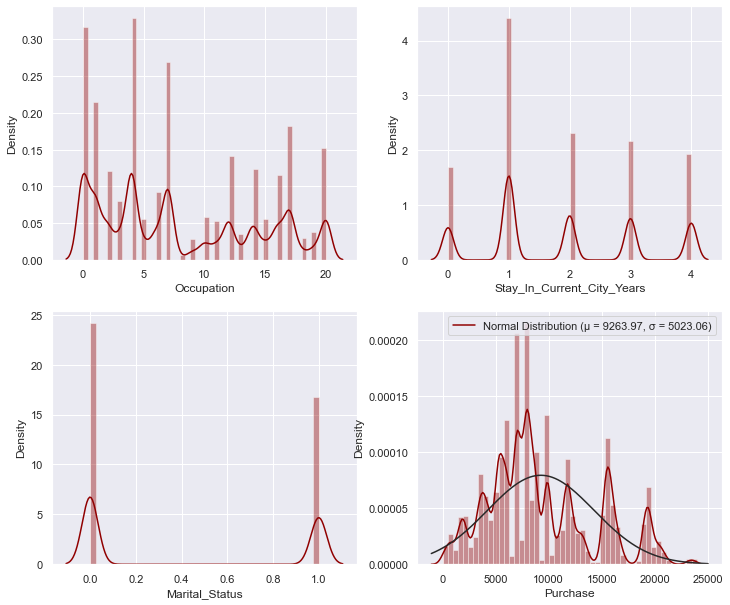

In [26]:
# Create a 2x2 grid of subplots
fig, axis = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))
fig.subplots_adjust(top=0.9)  # Adjust the top spacing of the subplots

# Plot distribution plots for each specified column
sns.distplot(w_df['Occupation'], kde=True, ax=axis[0,0], color="#900000")
sns.distplot(w_df['Stay_In_Current_City_Years'].astype(int), kde=True, ax=axis[0,1], color="#900000")
sns.distplot(w_df['Marital_Status'], kde=True, ax=axis[1,0], color="#900000")

# Plotting a distribution plot for the 'Purchase' variable with normal curve fit
sns.distplot(w_df['Purchase'], ax=axis[1,1], color="#900000", fit=norm)

# Fitting the target variable to the normal curve 
m, sigma = norm.fit(w_df['Purchase']) 
print("The m (mean) is {} and sigma (standard deviation) is {} for the curve".format(m, sigma))

# Adding a legend for the 'Purchase' distribution plot
axis[1,1].legend(['Normal Distribution (μ = {:.2f}, σ = {:.2f})'.format(m, sigma)], loc='best')

# Show the plots
plt.show()

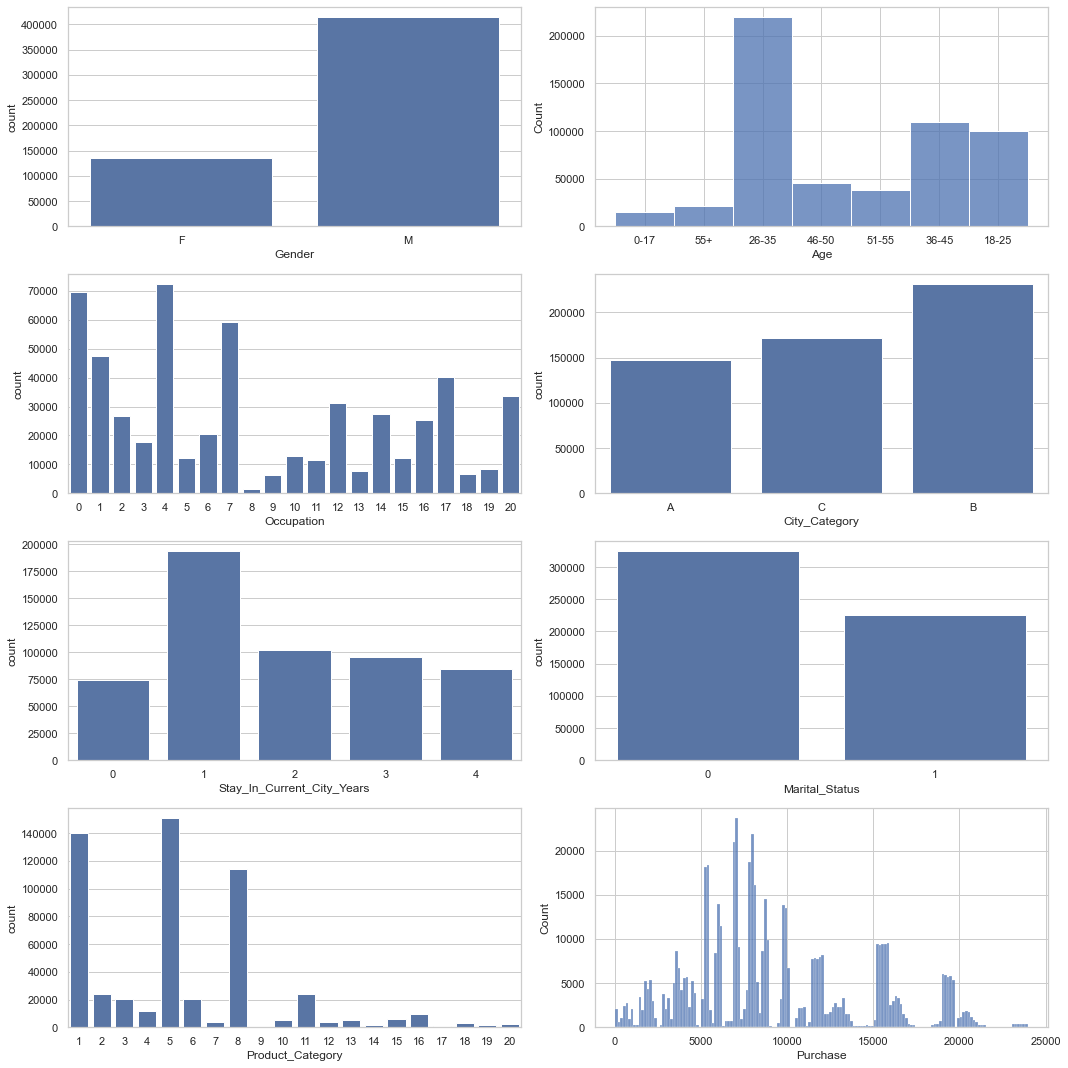

In [27]:
# Set the style of seaborn
sns.set(style="whitegrid")

# Create subplots
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(15, 15))

# Plot different visualizations for each subplot
sns.countplot(x='Gender', data=w_df, ax=axes[0, 0])
sns.histplot(x='Age', data=w_df, ax=axes[0, 1])
sns.countplot(x='Occupation', data=w_df, ax=axes[1, 0])
sns.countplot(x='City_Category', data=w_df, ax=axes[1, 1])
sns.countplot(x='Stay_In_Current_City_Years', data=w_df, ax=axes[2, 0])
sns.countplot(x='Marital_Status', data=w_df, ax=axes[2, 1])
sns.countplot(x='Product_Category', data=w_df, ax=axes[3, 0])
sns.histplot(x='Purchase', data=w_df, ax=axes[3, 1])

# Update layout for better display
fig.tight_layout()

# Show the plots
plt.show()


## Observations:

* Many buyers are male while the minority are female. Difference is due to the categories on sale during Black Friday, evaluating a particular category may change the count between genders.

* There are 7 categories defined to classify the age of the buyers

* Majority of the buyers are single

* Display of the occupation of the buyers. Occupation 8 has extremely low count compared with the others; it can be ignored for the calculation since it won't affect much the result.

* Majority of the products are in category 1, 5 and 8. The low number categories can be combined into a single category to greatly reduce the complexity of the problem.

* Higher count might represent the urban area indicates more population in City_Category.

* Most buyers have one year living in the city. Remaining categories are in uniform distribution

## Data visulizations with categorical features 

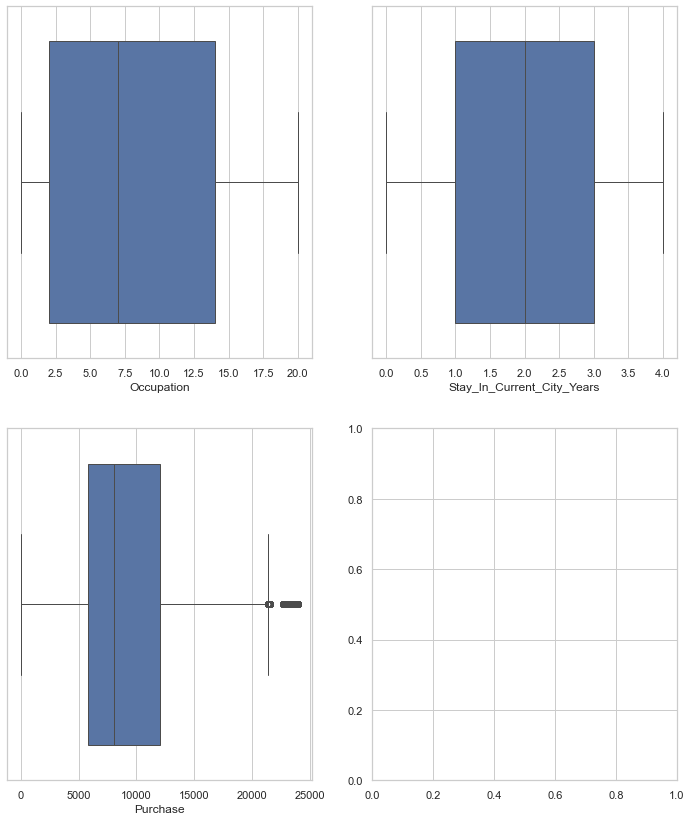

In [29]:
fig, axis = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))
fig.subplots_adjust(top=1.2)

sns.boxplot(data=w_df, x="Occupation", ax=axis[0,0])
sns.boxplot(data=w_df, x="Stay_In_Current_City_Years", orient='h', ax=axis[0,1])
sns.boxplot(data=w_df, x="Purchase", orient='h', ax=axis[1,0])
plt.show()

## Purchase and our features

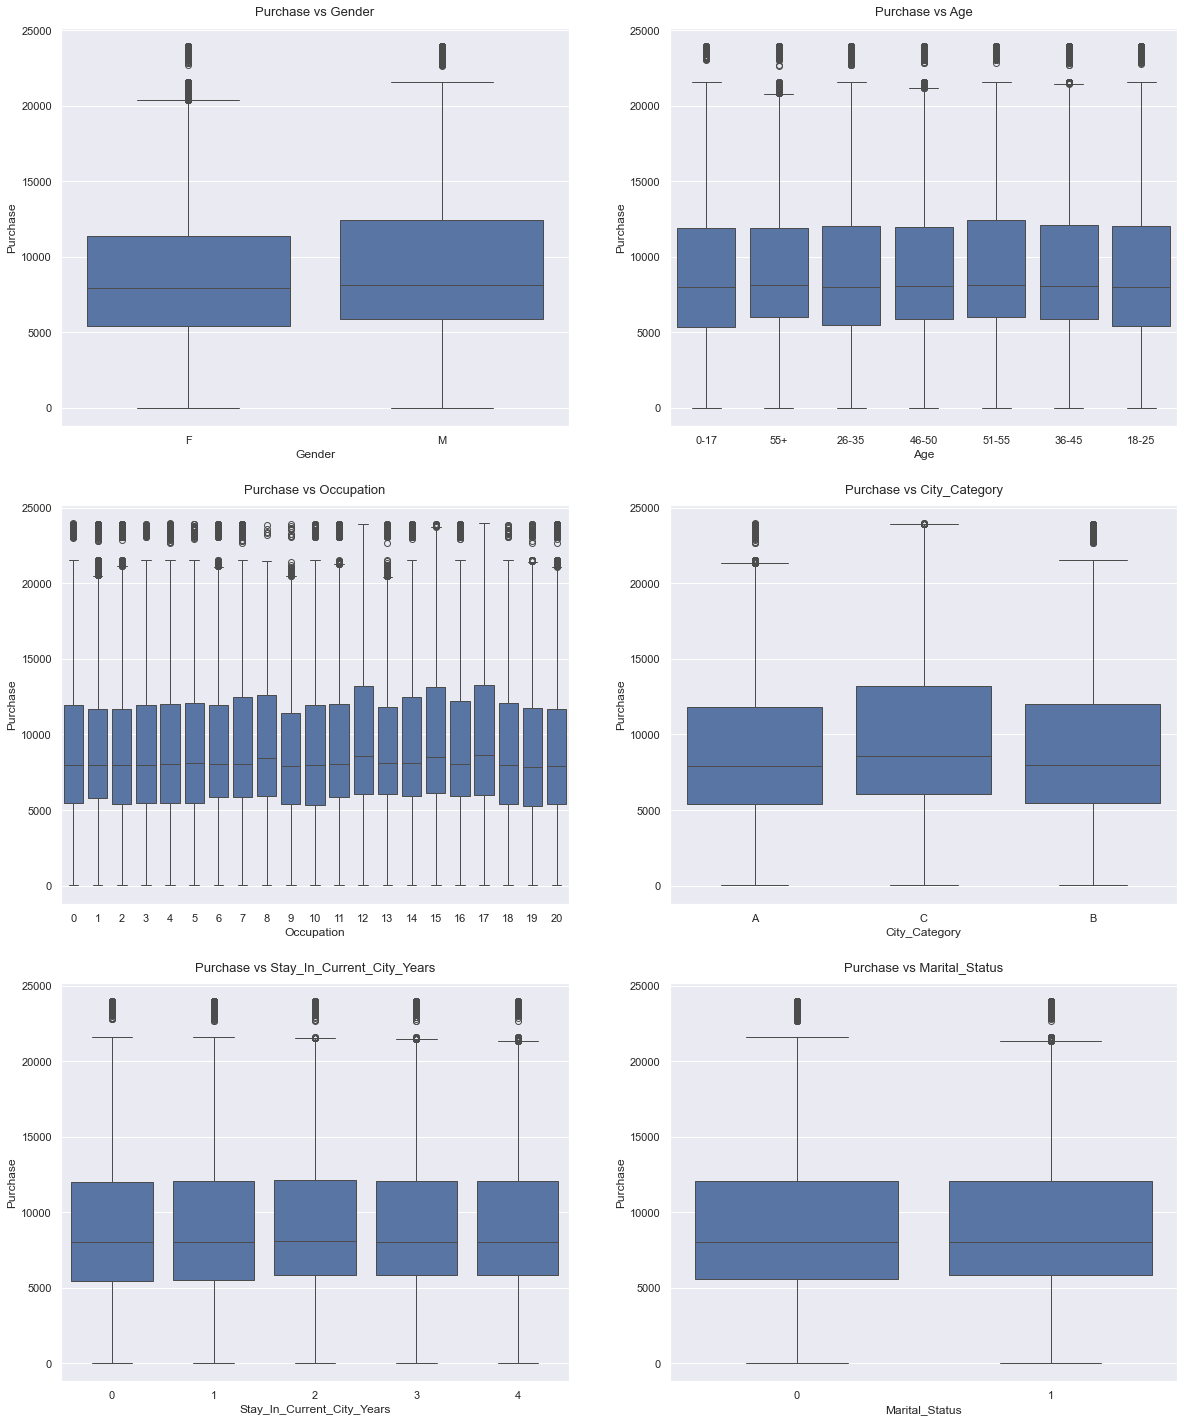

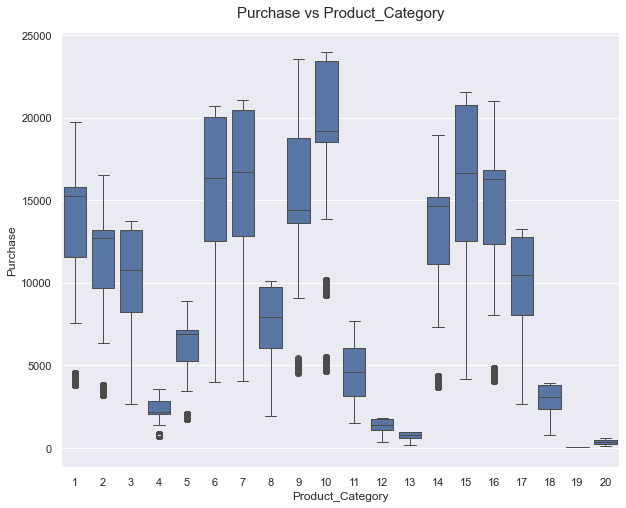

In [30]:
attributes = ['Gender', 'Age', 'Occupation', 'City_Category', 'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category']

sns.set(color_codes=True)
fig, axs = plt.subplots(nrows=3, ncols=2, figsize=(20, 16))
fig.subplots_adjust(top=1.3)
count = 0

for row in range(3):
    for col in range(2):
        sns.boxplot(data=w_df, y='Purchase', x=attributes[count], ax=axs[row, col])
        axs[row, col].set_title(f"Purchase vs {attributes[count]}", pad=12, fontsize=13)
        count += 1

plt.show()

plt.figure(figsize=(10, 8))
sns.boxplot(data=w_df, y='Purchase', x=attributes[-1])
plt.title(f"Purchase vs {attributes[-1]}", fontsize=15, pad=15)
plt.show()

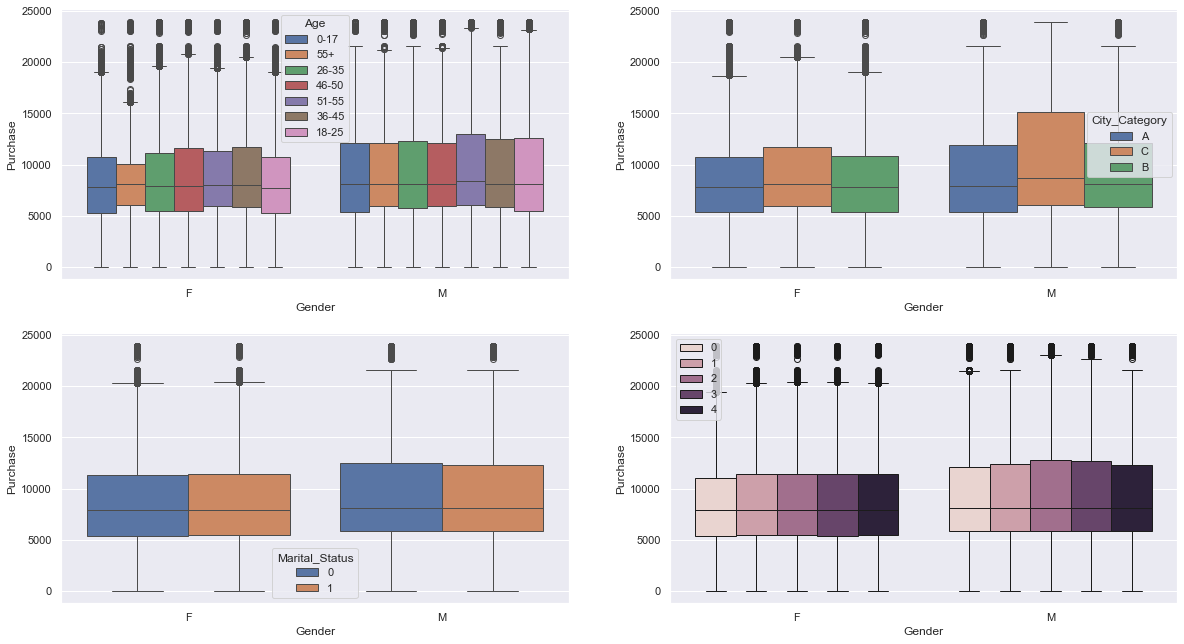

In [31]:
sns.set(color_codes = True)
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(20, 6))

fig.subplots_adjust(top=1.5)
sns.boxplot(data=w_df, y='Purchase', x='Gender', hue='Age', ax=axs[0,0])
sns.boxplot(data=w_df, y='Purchase', x='Gender', hue='City_Category', ax=axs[0,1])

sns.boxplot(data=w_df, y='Purchase', x='Gender', hue='Marital_Status', ax=axs[1,0])
sns.boxplot(data=w_df, y='Purchase', x='Gender', hue='Stay_In_Current_City_Years', ax=axs[1,1])
axs[1,1].legend(loc='upper left')

plt.show()


## Analysis

### 1. Are women spending more money per transaction than men? Why or Why not?

In [32]:
# Average amount spend per customer for Male and Female
amt_df = w_df.groupby(['User_ID', 'Gender'])[['Purchase']].sum()
avg_amt_df = amt_df.reset_index()
avg_amt_df

,User_ID,Gender,Purchase
0,1000001,F,334093
1,1000002,M,810472
2,1000003,M,341635
3,1000004,M,206468
4,1000005,M,821001
...,...,...,...
5886,1006036,F,4116058
5887,1006037,F,1119538
5888,1006038,F,90034
5889,1006039,F,590319


In [33]:
# Gender wise value counts in avg_amt_df
avg_amt_df['Gender'].value_counts()

Gender
M    4225
F    1666
Name: count, dtype: int64

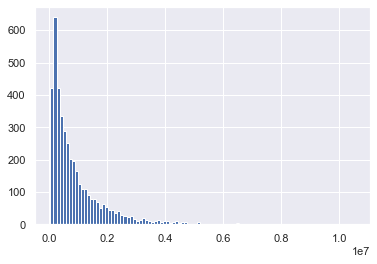

In [34]:
# histogram of average amount spend for each customer - Male
avg_amt_df[avg_amt_df['Gender']=='M']['Purchase'].hist(bins=100)
plt.show()

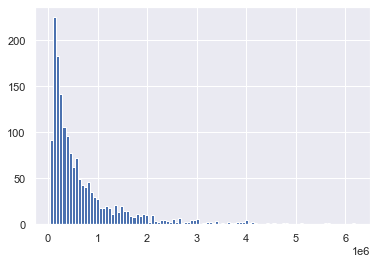

In [35]:
# histogram of average amount spend for each customer - Female
avg_amt_df[avg_amt_df['Gender']=='F']['Purchase'].hist(bins=100)
plt.show()

In [36]:
male_avg = avg_amt_df[avg_amt_df['Gender']=='M']['Purchase'].mean()
female_avg = avg_amt_df[avg_amt_df['Gender']=='F']['Purchase'].mean()

print("Average amount spend by Male customers: {:.2f}".format(male_avg))
print("Average amount spend by Female customers: {:.2f}".format(female_avg))

Average amount spend by Male customers: 925344.40
Average amount spend by Female customers: 712024.39


### 2. Confidence intervals and distribution of the mean of the expenses by female and male customers

In [37]:
male_df = avg_amt_df[avg_amt_df['Gender']=='M']
female_df = avg_amt_df[avg_amt_df['Gender']=='F']

In [38]:
genders = ["M", "F"]

male_sample_size = 3000
female_sample_size = 1500
num_repitions = 1000
male_means = []
female_means = []

for _ in range(num_repitions):
    male_mean = male_df.sample(male_sample_size, replace=True)['Purchase'].mean()
    female_mean = female_df.sample(female_sample_size, replace=True)['Purchase'].mean()
    
    male_means.append(male_mean)
    female_means.append(female_mean)

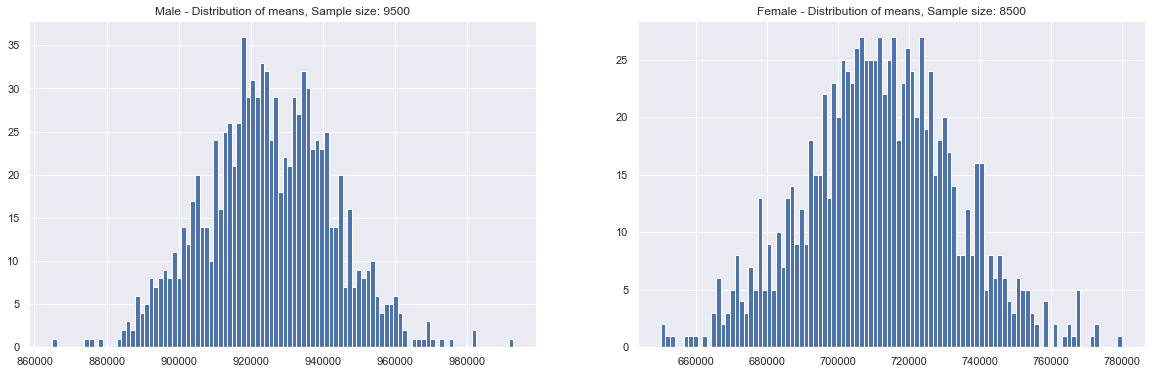



Population mean - Mean of sample means of amount spend for Male: 924888.21
Population mean - Mean of sample means of amount spend for Female: 712008.65

Male - Sample mean: 925344.40 Sample std: 985830.10
Female - Sample mean: 712024.39 Sample std: 807370.73


In [39]:
fig, axis = plt.subplots(nrows=1, ncols=2, figsize=(20, 6))

axis[0].hist(male_means, bins=100)
axis[1].hist(female_means, bins=100)
axis[0].set_title("Male - Distribution of means, Sample size: 9500")
axis[1].set_title("Female - Distribution of means, Sample size: 8500")

plt.show()

print("\n")
print("Population mean - Mean of sample means of amount spend for Male: {:.2f}".format(np.mean(male_means)))
print("Population mean - Mean of sample means of amount spend for Female: {:.2f}".format(np.mean(female_means)))

print("\nMale - Sample mean: {:.2f} Sample std: {:.2f}".format(male_df['Purchase'].mean(), male_df['Purchase'].std()))
print("Female - Sample mean: {:.2f} Sample std: {:.2f}".format(female_df['Purchase'].mean(), female_df['Purchase'].std()))

In [40]:
male_margin_of_error_clt = 1.64*male_df['Purchase'].std()/np.sqrt(len(male_df))
male_sample_mean = male_df['Purchase'].mean()
male_lower_lim = male_sample_mean - male_margin_of_error_clt
male_upper_lim = male_sample_mean + male_margin_of_error_clt

female_margin_of_error_clt = 1.64*female_df['Purchase'].std()/np.sqrt(len(female_df))
female_sample_mean = female_df['Purchase'].mean()
female_lower_lim = female_sample_mean - female_margin_of_error_clt
female_upper_lim = female_sample_mean + female_margin_of_error_clt

print("Male confidence interval of means: ({:.2f}, {:.2f})".format(male_lower_lim, male_upper_lim))
print("Female confidence interval of means: ({:.2f}, {:.2f})".format(female_lower_lim, female_upper_lim))

Male confidence interval of means: (900471.15, 950217.65)
Female confidence interval of means: (679584.51, 744464.28)


In [41]:
male_margin_of_error_clt = 1.96*male_df['Purchase'].std()/np.sqrt(len(male_df))
male_sample_mean = male_df['Purchase'].mean()
male_lower_lim = male_sample_mean - male_margin_of_error_clt
male_upper_lim = male_sample_mean + male_margin_of_error_clt

female_margin_of_error_clt = 1.96*female_df['Purchase'].std()/np.sqrt(len(female_df))
female_sample_mean = female_df['Purchase'].mean()
female_lower_lim = female_sample_mean - female_margin_of_error_clt
female_upper_lim = female_sample_mean + female_margin_of_error_clt

print("Male confidence interval of means: ({:.2f}, {:.2f})".format(male_lower_lim, male_upper_lim))
print("Female confidence interval of means: ({:.2f}, {:.2f})".format(female_lower_lim, female_upper_lim))


Male confidence interval of means: (895617.83, 955070.97)
Female confidence interval of means: (673254.77, 750794.02)


In [42]:
male_margin_of_error_clt = 2.58*male_df['Purchase'].std()/np.sqrt(len(male_df))
male_sample_mean = male_df['Purchase'].mean()
male_lower_lim = male_sample_mean - male_margin_of_error_clt
male_upper_lim = male_sample_mean + male_margin_of_error_clt

female_margin_of_error_clt = 2.58*female_df['Purchase'].std()/np.sqrt(len(female_df))
female_sample_mean = female_df['Purchase'].mean()
female_lower_lim = female_sample_mean - female_margin_of_error_clt
female_upper_lim = female_sample_mean + female_margin_of_error_clt

print("Male confidence interval of means: ({:.2f}, {:.2f})".format(male_lower_lim, male_upper_lim))
print("Female confidence interval of means: ({:.2f}, {:.2f})".format(female_lower_lim, female_upper_lim))

Male confidence interval of means: (886214.53, 964474.27)
Female confidence interval of means: (660990.91, 763057.88)


3. Are confidence intervals of average male and female spending overlapping? How can Walmart leverage this conclusion to make changes or improvements?

* The confidence intervals of average male and female spendings are not overlapping.

* Walmart can leverage this problem by taking sample dataset and apply this to whole population dataset by performing Central Limit Theorem and Confidence Intervals of 90%, 95%, or 99% by playing around with the width parameter by reporting those observations to Walmart.

### 4. Results when the same activity is performed for Married vs Unmarried

In [43]:
amt_df = w_df.groupby(['User_ID', 'Marital_Status'])[['Purchase']].sum()
avg_amt_df = amt_df.reset_index()
avg_amt_df

,User_ID,Marital_Status,Purchase
0,1000001,0,334093
1,1000002,0,810472
2,1000003,0,341635
3,1000004,1,206468
4,1000005,1,821001
...,...,...,...
5886,1006036,1,4116058
5887,1006037,0,1119538
5888,1006038,0,90034
5889,1006039,1,590319


In [44]:
avg_amt_df['Marital_Status'].value_counts()

Marital_Status
0    3417
1    2474
Name: count, dtype: int64

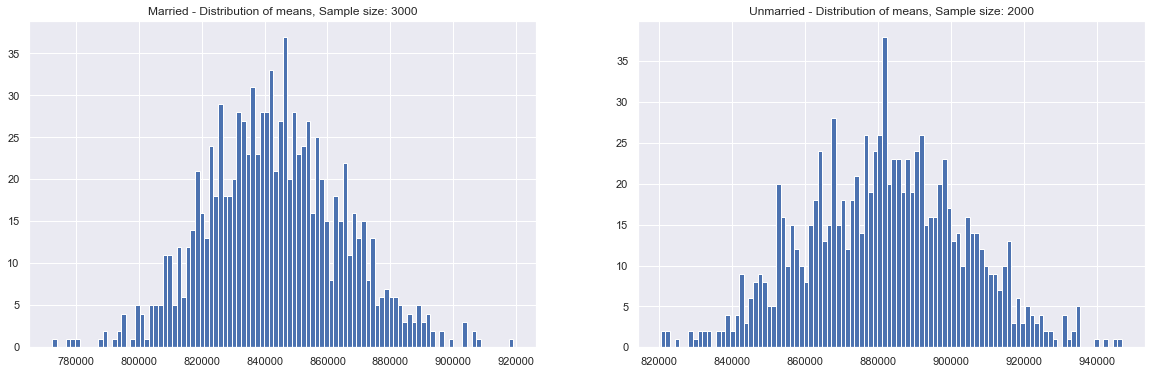



Population mean - Mean of sample means of amount spend for Married: 843164.50
Population mean - Mean of sample means of amount spend for Unmarried: 881759.52

Married - Sample mean: 843526.80 Sample std: 935352.12
Unmarried - Sample mean: 880575.78 Sample std: 949436.25


In [45]:
married_samp_size = 3000
married_samp_size = 2000
num_repitions = 1000
married_means = []
unmarried_means = []

for _ in range(num_repitions):
    married_mean = avg_amt_df[avg_amt_df['Marital_Status']==1].sample(married_samp_size, replace=True)['Purchase'].mean()
    unmarried_mean = avg_amt_df[avg_amt_df['Marital_Status']==0].sample(married_samp_size, replace=True)['Purchase'].mean()
    
    married_means.append(married_mean)
    unmarried_means.append(unmarried_mean)
    
    
fig, axis = plt.subplots(nrows=1, ncols=2, figsize=(20, 6))

axis[0].hist(married_means, bins=100)
axis[1].hist(unmarried_means, bins=100)
axis[0].set_title("Married - Distribution of means, Sample size: 3000")
axis[1].set_title("Unmarried - Distribution of means, Sample size: 2000")

plt.show()
print("\n")
print("Population mean - Mean of sample means of amount spend for Married: {:.2f}".format(np.mean(married_means)))
print("Population mean - Mean of sample means of amount spend for Unmarried: {:.2f}".format(np.mean(unmarried_means)))

print("\nMarried - Sample mean: {:.2f} Sample std: {:.2f}".format(avg_amt_df[avg_amt_df['Marital_Status']==1]['Purchase'].mean(), avg_amt_df[avg_amt_df['Marital_Status']==1]['Purchase'].std()))
print("Unmarried - Sample mean: {:.2f} Sample std: {:.2f}".format(avg_amt_df[avg_amt_df['Marital_Status']==0]['Purchase'].mean(), avg_amt_df[avg_amt_df['Marital_Status']==0]['Purchase'].std()))

In [46]:
for val in ["Married", "Unmarried"]:
    
    new_val = 1 if val == "Married" else 0
    
    new_df = avg_amt_df[avg_amt_df['Marital_Status']==new_val] 
    
    margin_of_error_clt = 1.64*new_df['Purchase'].std()/np.sqrt(len(new_df))
    sample_mean = new_df['Purchase'].mean()
    lower_lim = sample_mean - margin_of_error_clt
    upper_lim = sample_mean + margin_of_error_clt

    print("{} confidence interval of means: ({:.2f}, {:.2f})".format(val, lower_lim, upper_lim))

Married confidence interval of means: (812686.46, 874367.13)
Unmarried confidence interval of means: (853938.67, 907212.90)


In [47]:
for val in ["Married", "Unmarried"]:
    
    new_val = 1 if val == "Married" else 0
    
    new_df = avg_amt_df[avg_amt_df['Marital_Status']==new_val] 
    
    margin_of_error_clt = 2.58*new_df['Purchase'].std()/np.sqrt(len(new_df))
    sample_mean = new_df['Purchase'].mean()
    lower_lim = sample_mean - margin_of_error_clt
    upper_lim = sample_mean + margin_of_error_clt

    print("{} confidence interval of means: ({:.2f}, {:.2f})".format(val, lower_lim, upper_lim))

Married confidence interval of means: (795009.68, 892043.91)
Unmarried confidence interval of means: (838671.05, 922480.51)


### 5. Results when the same activity is performed for Age

We will analyze the spending patterns of customers in different age groups. By calculating confidence intervals for each age group, we can see which age range tends to spend more and how certain age groups differ in their spending habits.

In [48]:
amt_df = w_df.groupby(['User_ID', 'Age'])[['Purchase']].sum()
avg_amt_df = amt_df.reset_index()
avg_amt_df


,User_ID,Age,Purchase
0,1000001,0-17,334093
1,1000002,55+,810472
2,1000003,26-35,341635
3,1000004,46-50,206468
4,1000005,26-35,821001
...,...,...,...
5886,1006036,26-35,4116058
5887,1006037,46-50,1119538
5888,1006038,55+,90034
5889,1006039,46-50,590319


In [49]:
avg_amt_df['Age'].value_counts()

Age
26-35    2053
36-45    1167
18-25    1069
46-50     531
51-55     481
55+       372
0-17      218
Name: count, dtype: int64

In [50]:
sample_size = 200
num_repitions = 1000

all_means = {}

age_intervals = ['26-35', '36-45', '18-25', '46-50', '51-55', '55+', '0-17']
for age_interval in age_intervals:
    all_means[age_interval] = []

for age_interval in age_intervals:
    for _ in range(num_repitions):
        mean = avg_amt_df[avg_amt_df['Age']==age_interval].sample(sample_size, replace=True)['Purchase'].mean()
        all_means[age_interval].append(mean)

Now we can infer about the population that, 90% of the times

In [51]:
for val in ['26-35', '36-45', '18-25', '46-50', '51-55', '55+', '0-17']:
    
    new_df = avg_amt_df[avg_amt_df['Age']==val] 
    
    margin_of_error_clt = 1.64*new_df['Purchase'].std()/np.sqrt(len(new_df))
    sample_mean = new_df['Purchase'].mean()
    lower_lim = sample_mean - margin_of_error_clt
    upper_lim = sample_mean + margin_of_error_clt
    
    print("For age {}, confidence interval of means: ({:.2f}, {:.2f})".format(val, lower_lim, upper_lim))


For age 26-35, confidence interval of means: (952320.12, 1026998.51)
For age 36-45, confidence interval of means: (832542.56, 926788.86)
For age 18-25, confidence interval of means: (810323.44, 899402.80)
For age 46-50, confidence interval of means: (726410.64, 858686.93)
For age 51-55, confidence interval of means: (703953.00, 822448.85)
For age 55+, confidence interval of means: (487192.99, 592201.50)
For age 0-17, confidence interval of means: (542553.13, 695182.50)


In [52]:
for val in ['26-35', '36-45', '18-25', '46-50', '51-55', '55+', '0-17']:
    
    new_df = avg_amt_df[avg_amt_df['Age']==val] 
    
    margin_of_error_clt = 1.96*new_df['Purchase'].std()/np.sqrt(len(new_df))
    sample_mean = new_df['Purchase'].mean()
    lower_lim = sample_mean - margin_of_error_clt
    upper_lim = sample_mean + margin_of_error_clt

    print("For age {}, confidence interval of means: ({:.2f}, {:.2f})".format(val, lower_lim, upper_lim))

For age 26-35, confidence interval of means: (945034.42, 1034284.21)
For age 36-45, confidence interval of means: (823347.80, 935983.62)
For age 18-25, confidence interval of means: (801632.78, 908093.46)
For age 46-50, confidence interval of means: (713505.63, 871591.93)
For age 51-55, confidence interval of means: (692392.43, 834009.42)
For age 55+, confidence interval of means: (476948.26, 602446.23)
For age 0-17, confidence interval of means: (527662.46, 710073.17)


In [53]:
for val in ['26-35', '36-45', '18-25', '46-50', '51-55', '55+', '0-17']:
    
    new_df = avg_amt_df[avg_amt_df['Age']==val] 
    
    margin_of_error_clt = 2.58*new_df['Purchase'].std()/np.sqrt(len(new_df))
    sample_mean = new_df['Purchase'].mean()
    lower_lim = sample_mean - margin_of_error_clt
    upper_lim = sample_mean + margin_of_error_clt

    print("For age {}, confidence interval of means: ({:.2f}, {:.2f})".format(val, lower_lim, upper_lim))

For age 26-35, confidence interval of means: (930918.39, 1048400.25)
For age 36-45, confidence interval of means: (805532.95, 953798.47)
For age 18-25, confidence interval of means: (784794.60, 924931.63)
For age 46-50, confidence interval of means: (688502.19, 896595.37)
For age 51-55, confidence interval of means: (669993.82, 856408.03)
For age 55+, confidence interval of means: (457099.09, 622295.40)
For age 0-17, confidence interval of means: (498811.78, 738923.84)


## Final insights

After analyzing the data, we have gathered key insights about customer spending patterns based on age, gender, marital status, city category, and product categories.

### Actionable Insights
* For Age feature, we observed that ~ 80% of the customer's who belong to the age group 25-40 (40%: 26-35, 18%: 18-25, 20%: 36-45) tend to spend the most.

* For Gender feature, ~75% of the number of purchases are made by Male customer's and rest of the 25% is done by female customer's. This tells us the Male consumers are the major contributors to the number of sales for the retail store.On average the male gender spends more money on purchase contrary to female, and it is possible to also observe this trend by adding the total value of purchase.

  - Average amount spend by Male customers: 9,25,408.28
  - Average amount spend by Female customers: 7,12,217.18
* When we combined Purchase and Marital_Status for analysis (60% are Single, 40% are Married). We came to know that Single Men spend the most during the Black Friday. It also tells that Men tend to spend less once they are married. It maybe because of the added responsibilities.

* There is an interesting column Stay_In_Current_City_Years, after analyzing this column we came to know the people who have spent 1 year in the city tend to spend the most. This is understandable as, people who have spent more than 4 years in the city are generally well settled and are less interested in buying new things as compared to the people new to the city, who tend to buy more (35% Staying in the city since 1 year, 18% since 2 years, 17% since 3 years).

* When examining the City_Category which city the product was purchased to our surprise, even though the city B is majorly responsible for the overall sales income, but when it comes to the above product, it majorly purchased in the city C.

* Total of 20 product_categories are there. Product_Category - 1, 5, 8, & 11 have highest purchasing frequency.

* There are 20 differnent types of Occupation's in the city

### Confidence Intervals
Now using the Central Limit Theorem for the population:

* Average amount spend by male customers is 9,25,408.28
* Average amount spend by female customers is 7,12,217.18

Now we can infer about the population that, 90% of the times:

* Average amount spend by male customer will lie in between: (900471.15, 950217.65)
* Average amount spend by female customer will lie in between: (679584.51, 744464.28)

Now we can infer about the population that, 95% of the times:

* Average amount spend by male customer will lie in between: (895617.83, 955070.97)
* Average amount spend by female customer will lie in between: (673254.77, 750794.02)

Now we can infer about the population that, 99% of the times:

* Average amount spend by male customer will lie in between: (886214.53, 964474.27)
* Average amount spend by female customer will lie in between: (660990.91, 763057.88)

**Confidence Interval by Marital_Status**

Now we can infer about the population that, 90% of the times:

* Married confidence interval of means: (812686.46, 874367.13)
* Unmarried confidence interval of means: (853938.67, 907212.90)

Now we can infer about the population that, 95% of the times:

* Married confidence interval of means: (806668.83, 880384.76)
* Unmarried confidence interval of means: (848741.18, 912410.38)

Now we can infer about the population that, 99% of the times:

* Married confidence interval of means: (795009.68, 892043.91)
* Unmarried confidence interval of means: (838671.05, 922480.51)

**Confidence Interval by Age**

Now we can infer about the population that, 90% of the times:

 - For age 26-35, confidence interval of means: (952320.12, 1026998.51)
 - For age 36-45, confidence interval of means: (832542.56, 926788.86)
 - For age 18-25, confidence interval of means: (810323.44, 899402.80)
 - For age 46-50, confidence interval of means: (726410.64, 858686.93)
 - For age 51-55, confidence interval of means: (703953.00, 822448.85)
 - For age 55+, confidence interval of means: (487192.99, 592201.50)
 - For age 0-17, confidence interval of means: (542553.13, 695182.50)
 
Now we can infer about the population that, 95% of the times:

 - For age 26-35, confidence interval of means: (945034.42, 1034284.21)
 - For age 36-45, confidence interval of means: (823347.80, 935983.62)
 - For age 18-25, confidence interval of means: (801632.78, 908093.46)
 - For age 46-50, confidence interval of means: (713505.63, 871591.93)
 - For age 51-55, confidence interval of means: (692392.43, 834009.42)
 - For age 55+, confidence interval of means: (476948.26, 602446.23)
 - For age 0-17, confidence interval of means: (527662.46, 710073.17)
 
Now we can infer about the population that, 99% of the times:

 - For age 26-35, confidence interval of means: (930918.39, 1048400.25)
 - For age 36-45, confidence interval of means: (805532.95, 953798.47)
 - For age 18-25, confidence interval of means: (784794.60, 924931.63)
 - For age 46-50, confidence interval of means: (688502.19, 896595.37)
 - For age 51-55, confidence interval of means: (669993.82, 856408.03)
 - For age 55+, confidence interval of means: (457099.09, 622295.40)
 - For age 0-17, confidence interval of means: (498811.78, 738923.84)


## Recommendations 

- Men spent more money than women, So company should focus on retaining the female customers and getting more female customers.

- Product_Category - 1, 5, 8, & 11 have highest purchasing frequency. it means these are the products in these categories are liked more by customers. Company can focus on selling more of these products or selling more of the products which are purchased less.

- Unmarried customers spend more money than married customers, So company should focus on acquisition of married customers.

- Customers in the age 25-40 spend more money than the others, So company should focus on acquisition of customers of other age groups.

- The tier-2 city called B has the highest number of population, management should open more outlets in the tier-1 and tier-2 cities like A and C in order to increase the buisness.